In [3]:
import numpy as np
import matplotlib.pyplot as plt
import DataPreprocessing
from functools import reduce

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [47]:
def graph_data(me_filename, mom_filename):    
    me = np.load(me_filename, allow_pickle=True)[20000:] #Matrix elements
    print('hi')
    mom = np.load(mom_filename, allow_pickle=True, encoding='bytes')[20000:] #4-momenta of inputs
    print('ho')
    
    ##Multiply matrix element
    mandel_multiply = reduce(np.multiply, DataPreprocessing.mandel_creation(['2,3,4','2,3,4'], mom))
    ##Gradient
    
    print('hi')
    #print(mandel_multiply.shape)
    #print(me.shape)
    me = np.multiply(me, mandel_multiply)
    
    
    print('ho')
    mandel = np.transpose(DataPreprocessing.mandel_creation(['2,3'], mom)[0])
    mandel.shape= (len(mandel),1)
    linreg = LinearRegression().fit(np.log10(mandel), np.log10(me))

    print('Gradient : {}'.format(linreg.coef_[0]))
    print('Intercept : {}'.format(linreg.intercept_))
    
    return (me, DataPreprocessing.mandel_creation(['2,3,4'], mom)[0], linreg)

hi
ho
hi
ho
Gradient : 0.00015871829612039765
Intercept : -0.3322490891304158


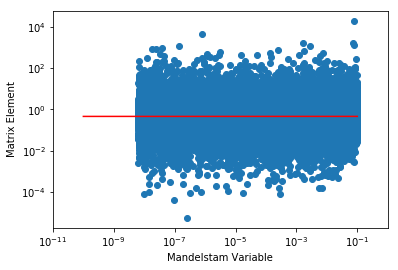

In [48]:
me, S, linreg = graph_data('LO/MG_uuxgg_smalls/me_100000.npy', 'LO/MG_uuxgg_smalls/mom_100000.npy')

plt.xlim(10**-(11), 1)
plt.yscale('log')
plt.xscale('log')

plt.ylabel('Matrix Element')
plt.xlabel('Mandelstam Variable')
plt.scatter(S, me)

plt.plot(np.logspace(-10, -1,100),10**linreg.predict(np.array([np.linspace(-10, -1,100)]).T),color='r')

In [ ]:
me = np.load('LO/MG_uuxgg_smalls/me_100000.npy', allow_pickle=True) #Matrix elements
mom_raw = np.load('LO/MG_uuxgg_smalls/mom_100000.npy', allow_pickle=True, encoding='bytes') #4-momenta of inputs
mom = np.array([np.array(element) for element in mom_raw])

##Gradient
mandel = DataPreprocessing.mandel_creation(['2,3'], mom).T


plt.scatter(range(0,50),me[:50])
#plt.yscale('log')